## LSTM Model Training

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pickle

In [ ]:
data = pd.read_csv('/content/bitcoin_price_stream.csv')  # Replace with your file path
prices = data['avg_price'].values

In [ ]:
print(prices)

[84955.07892063 84949.29230352 84957.20518428 84964.29164894
 84937.56132653 84919.37728571 84917.54642105 84898.45716312
 84887.99736264 84887.99601504 84888.2192027  84869.41635389
 84837.70957731 84806.75207483 84803.2115     84795.48580827
 84804.24877483 84797.8201983  84788.78781038 84775.32792373
 84774.36822404 84778.10061813 84789.87661355 84797.01355228
 84805.72235294 84801.94211268 84803.9331677  84838.39005054
 84827.90728097 84813.12055202 84809.69219868 84794.53901724
 84788.94911765 84783.42896848 84786.14762148 84772.42555769
 84757.48956464 84744.30376289 84738.17755287 84749.62780142
 84740.68046809 84749.81394737 84790.13426032 84799.36031447
 84794.67738318 84789.21454545 84811.67603175 84834.12389362
 84825.59141509 84815.37744813 84804.55831541 84806.66046512
 84808.63304487 84829.5778341  84840.12194969 84824.04976247
 84820.08315476 84810.3419969  84789.3762775  84810.44704942
 84811.264942   84814.64511149 84822.2046063  84823.01650847
 84821.69853755 84820.74

In [ ]:
a = [i for i in window]
a.append(target)
max(a) - min(a)

np.float64(208.9362076808029)

In [ ]:
a=[]
a.extend(list(window))
a.extend(list(target))
print(a)

TypeError: 'numpy.float64' object is not iterable

In [ ]:
window_size = 60
X = []
y = []
min_max = []
buffer_percent = 0.05

for i in range(len(prices) - window_size - 1):
    a =[]
    window = prices[i:i+window_size]
    target = prices[i+window_size+1]
    a = [i for i in window]
    a.append(target)

    row_min = min(a)
    row_max = max(a)

    # Avoid division by zero
    if row_max - row_min == 0:
        continue

        # Apply buffer
    buffer = buffer_percent * (row_max - row_min)
    row_min -= buffer
    row_max += buffer

    window_scaled = (window - row_min) / (row_max - row_min)
    target_scaled = (target - row_min) / (row_max - row_min)

    X.append(window_scaled)
    y.append(target_scaled)
    min_max.append((row_min, row_max))

X = np.array(X)
y = np.array(y)
min_max = np.array(min_max)

# Reshape X for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
len(X[0]), min_max[0], y[0]

(60, array([84726.87184807, 84975.59735374]), np.float64(0.3528920895671033))

In [ ]:
X.shape

(785, 60, 1)

In [ ]:
y.shape

(785,)

In [ ]:
X_train, X_test, y_train, y_test, mm_train, mm_test = train_test_split(
    X, y, min_max, test_size=0.2, shuffle=False
)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.1871 - val_loss: 0.0395
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0656 - val_loss: 0.0410
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0512 - val_loss: 0.0333
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0404 - val_loss: 0.0312
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0357 - val_loss: 0.0264
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0326 - val_loss: 0.0273
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0325 - val_loss: 0.0302
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0326 - val_loss: 0.0321
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0304 - val_loss: 0.0237
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0277 - val_loss: 0.0228
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0281 - val_loss: 0.0245
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = []
y_true = []

for i in range(len(y_pred_scaled)):
    row_min, row_max = mm_test[i]
    pred_real = y_pred_scaled[i][0] * (row_max - row_min) + row_min
    true_real = y_test[i] * (row_max - row_min) + row_min
    y_pred.append(pred_real)
    y_true.append(true_real)

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


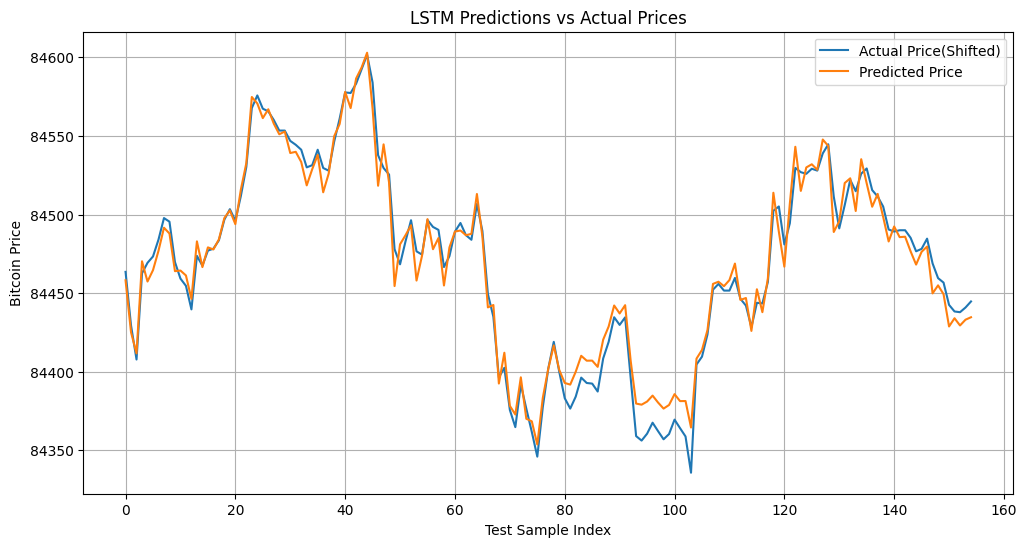

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_true[:-2], label='Actual Price(Shifted)')
plt.plot(y_pred[2:], label='Predicted Price')
plt.legend()
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Bitcoin Price')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# MAPE
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 20.3250
Mean Absolute Percentage Error (MAPE): 0.02%


In [ ]:
model.save('bitcoin_lstm_model_with_buffer_Mark-2.keras')
with open('min_max_values_with_buffer_Mark-2.pkl', 'wb') as f:
    pickle.dump(min_max.tolist(), f)
